In [1]:
import json
import word2vec
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from adjustText import adjust_text
import matplotlib.pyplot as plt

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import optimizers

from sklearn.model_selection import train_test_split



Using TensorFlow backend.


In [2]:
with open('/home/hscc/Desktop/kaggle/train.json/train.json', 'r') as train_file:
    train_data = json.load(train_file)

print ( train_data[68] )
print ( len(train_data) )


{'id': 43769, 'cuisine': 'french', 'ingredients': ['orange juice concentrate', 'pumpkin purée', 'marshmallow creme', 'toasted pecans', 'maple syrup', 'ground cinnamon', 'gingersnap', 'ground nutmeg', 'cream cheese']}
39774


In [3]:
with open('/home/hscc/Desktop/kaggle/train.json/train_linef', 'w', ) as train_linef:
    
    for cuisine_num in range(len(train_data)):
        for ingr_num in range (len(train_data[cuisine_num]["ingredients"])):
            try:
                ingr = str(train_data[cuisine_num]["ingredients"][ingr_num].encode('utf-8')).replace(" ", "_")
                ingr = ingr.split('\\')[0]
                ingr = ingr.split('\'')[1]
                train_linef.write( ingr +" ")
            except Exception as e:
                train_linef.write(str(train_data[cuisine_num]["ingredients"][ingr_num].encode('utf-8')).replace(" ", "_"))
                #print (e)

                0.0 #有材料被吃掉了
            
        train_linef.write("\n")
    

In [4]:
food_cuisine={}
for item in range(len(train_data)):
    if train_data[item]['cuisine'] not in food_cuisine:
        food_cuisine[train_data[item]['cuisine']] = 1
    else:
        food_cuisine[train_data[item]['cuisine']] = food_cuisine[train_data[item]['cuisine']]+1

print (food_cuisine)
print ("total: "+ str(len(food_cuisine)))

{'spanish': 989, 'vietnamese': 825, 'southern_us': 4320, 'japanese': 1423, 'indian': 3003, 'cajun_creole': 1546, 'irish': 667, 'filipino': 755, 'korean': 830, 'mexican': 6438, 'greek': 1175, 'brazilian': 467, 'chinese': 2673, 'british': 804, 'russian': 489, 'french': 2646, 'italian': 7838, 'moroccan': 821, 'thai': 1539, 'jamaican': 526}
total: 20


In [5]:
vec_size = 256
word2vec.word2vec('/home/hscc/Desktop/kaggle/train.json/train_linef', '/home/hscc/Desktop/kaggle/train.json/train_Mymodel.bin', size=vec_size, verbose=True,min_count=0)

b'Starting training using file /home/hscc/Desktop/kaggle/train.json/train_linef\n'b'100K\r200K\r300K\r400K\rVocab size: 6683\n'b'Words in train file: 468039\n'b'\rAlpha: 0.025000  Progress: 0.43%  Words/thread/sec: 88.64k  \rAlpha: 0.025000  Progress: 0.86%  Words/thread/sec: 155.47k  \rAlpha: 0.024679  Progress: 1.71%  Words/thread/sec: 152.72k  \rAlpha: 0.024572  Progress: 2.14%  Words/thread/sec: 176.81k  \rAlpha: 0.024465  Progress: 2.57%  Words/thread/sec: 192.84k  \rAlpha: 0.024251  Progress: 3.42%  Words/thread/sec: 221.63k  \rAlpha: 0.024144  Progress: 3.85%  Words/thread/sec: 227.02k  \rAlpha: 0.024465  Progress: 2.99%  Words/thread/sec: 205.72k  \rAlpha: 0.025000  Progress: 1.28%  Words/thread/sec: 144.68k  \rAlpha: 0.024038  Progress: 4.28%  Words/thread/sec: 243.29k  \rAlpha: 0.023931  Progress: 4.70%  Words/thread/sec: 235.46k  \rAlpha: 0.023824  Progress: 5.13%  Words/thread/sec: 256.18k  \rAlpha: 0.023610  Progress: 5.99%  Words/thread/sec: 260.20k  \rAlpha: 0.023824  Pr

In [6]:
model = word2vec.load('/home/hscc/Desktop/kaggle/train.json/train_Mymodel.bin')

In [7]:
model.vocab
print (len(model.vocab))

6683


In [8]:
model['onions'][:10]

array([-0.05682805, -0.05441504,  0.01679767,  0.05009936,  0.06916711,
        0.02854044, -0.08097484, -0.09223967,  0.05074256,  0.02737109])

In [9]:
indexes, metrics = model.cosine('onions')
indexes, metrics

(array([  65,   79,  102,  663,  204,  147,  365,  103, 4551,  205]),
 array([ 0.80370228,  0.77694512,  0.77346336,  0.77160145,  0.7704363 ,
         0.77037731,  0.7507686 ,  0.74674164,  0.74548886,  0.74524285]))

In [10]:
model.vocab[indexes]

array(['yellow_onion', 'chicken', 'bay_leaf', 'red_kidney_beans',
       'frozen_peas', 'rice', 'tomato_pur', 'celery',
       'vegetable_bouillon_cube', 'beef_broth'],
      dtype='<U78')

In [11]:
vacab_array = np.array([])

for i in range(len(model.vocab)):
    vacab_array = np.append(vacab_array, model[model.vocab[i]] )

vacab_array = vacab_array.reshape(len(model.vocab),vec_size)

vocab_tsne = TSNE(random_state=0, n_components=2).fit_transform(vacab_array)

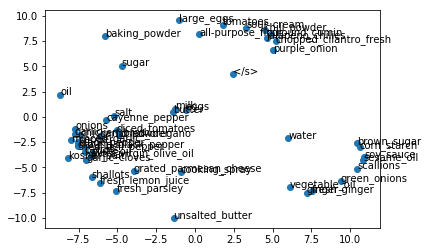

In [12]:
plt.scatter(vocab_tsne[0:50, 0], vocab_tsne[0:50, 1])


for i, txt in enumerate(model.vocab[0:50]):
    plt.annotate(txt,(vocab_tsne[0:50, 0][i], vocab_tsne[0:50, 1][i]))

plt.show()

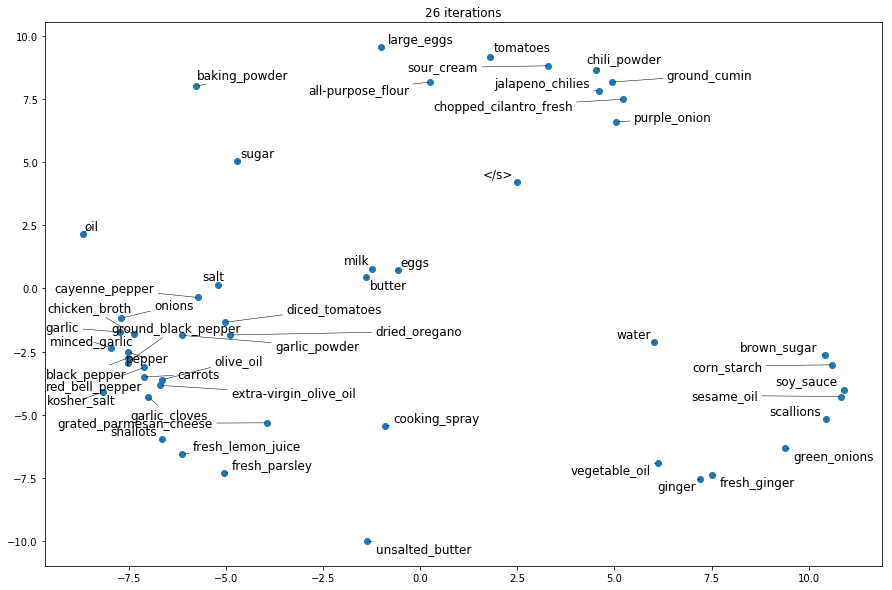

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(vocab_tsne[0:50, 0], vocab_tsne[0:50, 1])

texts =[]
for x, y, txt in zip( vocab_tsne[0:50, 0], vocab_tsne[0:50, 1] , model.vocab[0:50] ):
    texts.append(plt.text(x,y,txt,size=12))
plt.title(str(adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5)))+' iterations')

plt.show()


####  Training Model

In [14]:
batch_size = 128
num_classes = 20
epochs = 100

In [15]:
food_cuisine_iD={}

with open('/home/hscc/Desktop/kaggle/train.json/train.json', 'r') as train_file:
    train_data = json.load(train_file)

id=-1;
for item in range(len(train_data)):
    if train_data[item]['cuisine'] not in food_cuisine_iD:
        id += 1
        food_cuisine_iD[train_data[item]['cuisine']]= id
        
print (food_cuisine_iD)

{'spanish': 5, 'vietnamese': 11, 'southern_us': 1, 'japanese': 15, 'indian': 3, 'cajun_creole': 12, 'irish': 16, 'filipino': 2, 'korean': 17, 'mexican': 7, 'greek': 0, 'brazilian': 13, 'chinese': 8, 'british': 9, 'russian': 19, 'french': 14, 'italian': 6, 'moroccan': 18, 'thai': 10, 'jamaican': 4}


In [16]:
def tran_for_model(ingr_o):
    try:
        ingr = ingr_o.replace(" ", "_")
        ingr = ingr.split('\\')[0]
        ingr = ingr.split('\'')[1]
    except Exception as e:
        ingr = ingr_o.replace(" ", "_")
        
    return ingr

In [17]:
def vec_sum(ingr_list):
    sum_vec=np.zeros(vec_size)
    count = len(ingr_list)
    for num in range(len(ingr_list)):
        try:
            sum_vec = np.add(sum_vec,model[tran_for_model(ingr_list[num])])
        except Exception as e:
            print (e)        #Some ingr not in model ?  //to be solved
            count -= 1
            
    if count != 0:
        sum_vec /= count

    return sum_vec


In [18]:
with open('/home/hscc/Desktop/kaggle/train.json/train_d.csv', 'w') as train_dfile:
    train_dfile.write('label,')
    headline=[]
    for num in range(vec_size):
        headline.append('feature'+str(num)+' ')
    train_dfile.write(','.join(str(l) for l in headline))
    train_dfile.write('\n')
    for item in range(len(train_data)):
        train_dfile.write(str(food_cuisine_iD[train_data[item]['cuisine']])+',')
        
        vec_sum_ar = np.array([])
        vec_sum_ar = vec_sum(train_data[item]['ingredients'])
        train_dfile.write(','.join(str(n) for n in vec_sum_ar) + "\n")
        


'pumpkin_purée'
'kahlúa'
'kahlúa'
'kahlúa'
'grated_Gruyère_cheese'
'tomato_purée'
'Bertolli®_Classico_Olive_Oil'
'Old_El_Paso™_mild_red_enchilada_sauce'
'Pillsbury™_Refrigerated_Crescent_Dinner_Rolls'
'crème_fraîche'
'Sargento®_Traditional_Cut_Shredded_Mozzarella_Cheese'
'sheep’s_milk_cheese'
'crème_fraîche'
's_Condensed_Tomato_Soup'
''
'crème_fraîche'
'crème_fraîche'
'Niçoise_olives'
's_cheese'
'tomato_purée'
'tomato_purée'
'quatre_épices'
'tomato_purée'
'grated_Gruyère_cheese'
'kahlúa'
's_cheese'
's_cheese'
's_Condensed_Cream_of_Chicken_Soup'
'crème_fraîche'
'pumpkin_purée'
'tomato_purée'
'tomato_purée'
'Country_Crock®_Spread'
'tomato_purée'
'crème_fraîche'
'pumpkin_purée'
'grated_Gruyère_cheese'
'Old_El_Paso™_chopped_green_chiles'
'Country_Crock®_Spread'
'_or_best_food_real_mayonnais'
'_or_best_food_real_mayonnais'
'Knorr®_Beef_Bouillon'
'OREO®_Cookies'
'Niçoise_olives'
'_or_best_food_real_mayonnais'
'pumpkin_purée'
'tomato_purée'
'rosé_wine'
'crème_fraîche'
'grated_Gruyère_cheese'


'grated_Gruyère_cheese'
'crème_fraîche'
'tomato_purée'
'pumpkin_purée'
'tomato_purée'
'tomato_purée'
'crème_fraîche'
'Niçoise_olives'
'tomato_purée'
'tomato_purée'
'_or_best_food_real_mayonnais'
'tomato_purée'
'crème_fraîche'
'Soy_Vay®_Toasted_Sesame_Dressing_&_Marinade'
'tomato_purée'
'tomato_purée'
'Soy_Vay®_Veri_Veri_Teriyaki®_Marinade_&_Sauce'
'curaçao'
'pâté'
'tomato_purée'
'grated_Gruyère_cheese'
'tomato_purée'
'tomato_purée'
'Country_Crock®_Spread'
'açai'
'crème_de_menthe'
'tomato_purée'
'crème_fraîche'
'tomato_purée'
'pâté'
'kahlúa'
's_Condensed_Tomato_Soup'
'grated_Gruyère_cheese'
'crème_fraîche'
'tomato_purée'
'Hidden_Valley®_Original_Ranch®_Dressing'
'tomato_purée'
'tomato_purée'
'Bertolli®_Classico_Olive_Oil'
'crème_fraîche'
'_or_best_food_light_mayonnais'
'tomato_purée'
'crème_fraîche'
'tomato_purée'
'Niçoise_olives'
'tomato_purée'
'chestnut_purée'
'crème_fraîche'
'pumpkin_purée'
's_Ready_Rice_Whole_Grain_Brown_Rice'
'crème_fraîche'
'Lipton®_Recipe_Secrets®_Onion_Soup_Mix'

'_or_best_food_real_mayonnais'
'tomato_purée'
'crème_fraîche'
'crème_fraîche'
'tomato_purée'
'crème_fraîche'
'tomato_purée'
'Niçoise_olives'
'Breakstone’s_Sour_Cream'
'tomato_purée'
'grated_Gruyère_cheese'
'crème_fraîche'
'crème_fraîche'
'pâté'
'tomato_purée'
'tomato_purée'
'tomato_purée'
'Old_El_Paso™_taco_seasoning_mix'
'n_Chunky_salsa'
'Pillsbury™_Refrigerated_Crescent_Dinner_Rolls'
'Country_Crock®_Spread'
'beurre_manié'
'crème_de_menthe'
'_or_best_food_real_mayonnais'
'crème_fraîche'
'crème_fraîche'
'tomato_purée'
'crème_fraîche'
'tomato_purée'
'grated_Gruyère_cheese'
'Hidden_Valley®_Original_Ranch®_Light_Dressing'
'grated_Gruyère_cheese'
'crème_fraîche'
'tomato_purée'
's_trotters'
'Niçoise_olives'
'crème_fraîche'
'tomato_purée'
's_cheese'
'Old_El_Paso™_taco_seasoning_mix'
'_or_best_food_light_mayonnais'
'Pillsbury™_Refrigerated_Crescent_Dinner_Rolls'
'grated_Gruyère_cheese'
'Bertolli®_Alfredo_Sauce'
'Bertolli®_Classico_Olive_Oil'
'Country_Crock®_Spread'
'_or_best_food_light_mayonn

In [19]:
with open('/home/hscc/Desktop/kaggle/test.json/test.json', 'r') as test_file:
    with open('/home/hscc/Desktop/kaggle/test.json/test_d.csv', 'w') as test_dfile:
    
        test_data = json.load(test_file)
        
        test_iD=[]
        
        headline=[]
        for num in range(vec_size):
            headline.append('feature'+str(num)+' ')
        test_dfile.write(','.join(str(l) for l in headline))
        test_dfile.write('\n')

        for item in range(len(test_data)):
            test_iD.append(test_data[item]['id'])
            vec_sum_ar = np.array([])
            vec_sum_ar = vec_sum(test_data[item]['ingredients'])
            test_dfile.write(','.join(str(n) for n in vec_sum_ar) + "\n")

'Grey_Poupon_Dijon_Mustard'
'chicken_seasoning_mix'
'japanese_greens'
'krachai'
'Nu-Salt_Salt_Substitute'
'Country_Crock®_Spread'
'pork_steaks'
'tomato_purée'
'stir_fry_noodles'
'bluefish'
'reduced_fat_reduced_sodium_condensed_cream_of_chicken_soup'
'crème_fraîche'
'Pillsbury™_Refrigerated_Crescent_Dinner_Rolls'
's_cheese'
'rapini'
'nonfat_thousand_island_dressing'
'tri_color_pasta_twists,_cooked_and_drained'
'spring_chicken'
'rouget'
'pumpkin_purée'
'dress_russian'
'elderflower_syrup'
'Daisy_Brand_Light_Sour_Cream'
'pomegranate_syrup'
'tomato_purée'
'crème_fraîche'
'vegetable_base'
'medium_grain_brown_rice'
'knorr_shrimp_flavor_bouillon_cube'
'multigrain_bread'
'OREO®_Cookies'
'fresh'
'american_long_grain_rice'
'potato_sticks'
'shanghai-style_noodles'
'celery_cabbage'
'Red_Gold®_diced_tomatoes'
'asti'
'frozen_cranberries'
'horse_gram'
'white_lentils'
'Holland_House_White_Cooking_Wine'
'cracked_peppercorn'
'_or_best_food_real_mayonnais'
'TACO_BELL®_Thick_&_Chunky_Medium_Salsa'
'beef_st

'italian_spicy_sausage'
'corncobs'
'liquid_non-dairy_creamer'
's_cheese'
'cassis'
'tomato_purée'
'tomato_basil_feta'
'grape_jelly'
'crème_fraîche'
'pumpkin_pie_filling'
'pumpkin_butter'
'chèvre'
'atar'
'purple_bell_peppers'
'chive_flowers'
'Yoplait®_Greek_2%_Key_lime_pie_yogurt'
'Klondike_Gourmet_mini_potatoes'
'_or_best_food_real_mayonnais'
'stir_fry_oil'
'chèvre'
'toffee_pieces'
'Bramley_apples'
'whole_green_peperoncini'
's_cheese'
'dogfish'
'Land_O_Lakes®_Butter'
'potato_puree'
'Land_O_Lakes®_Butter'
'curaçao'
'sweet_potato_squash'
'dill_pickle_spear'
'Knorr®_Beef_flavored_Bouillon_Cube'
'crème_fraîche'
'opal_basil'
'herb_sauce'
'açai'
'sambhar_powder'
'tomato_purée'
's®_Ready_Rice®_Original_Long_Grain'
'_or_best_food_real_mayonnais'
'crushed_ritz_crackers'
'manzanilla_sherry'
's®_Real_Mayonnaise'
'crème_de_cassis'
'Johnsonville®_Italian_All_Natural_Hot_Ground_Sausage'
'Ronzoni_Penne_Rigate'
'amaranth_seeds'
'McCormick_Original_Country_Gravy_Mix'
'no_salt_added_ketchup'
'chopped_mac

In [20]:
train = pd.read_csv('/home/hscc/Desktop/kaggle/train.json/train_d.csv').values
test  = pd.read_csv('/home/hscc/Desktop/kaggle/test.json/test_d.csv').values
x_train = train[:,1:].astype('float32')          
x_test = test[:,:].astype('float32')
y_train = train[:,0]

In [21]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

39774 train samples
9944 test samples


In [22]:
y_train = np_utils.to_categorical(y_train, num_classes)

In [23]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(vec_size,)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                5140      
Total para

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'adamax',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_split=0.05,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 37785 samples, validate on 1989 samples
Epoch 1/100
37785/37785 [==============================] - 1s - loss: 1.4705 - acc: 0.5553 - val_loss: 1.2586 - val_acc: 0.6053
Epoch 2/100
37785/37785 [==============================] - 1s - loss: 1.2794 - acc: 0.5999 - val_loss: 1.2016 - val_acc: 0.6204
Epoch 3/100
37785/37785 [==============================] - 1s - loss: 1.2408 - acc: 0.6116 - val_loss: 1.1906 - val_acc: 0.6229
Epoch 4/100
37785/37785 [==============================] - 1s - loss: 1.2181 - acc: 0.6190 - val_loss: 1.1616 - val_acc: 0.6275
Epoch 5/100
37785/37785 [==============================] - 1s - loss: 1.2009 - acc: 0.6230 - val_loss: 1.1559 - val_acc: 0.6310
Epoch 6/100
37785/37785 [==============================] - 1s - loss: 1.1829 - acc: 0.6297 - val_loss: 1.1411 - val_acc: 0.6365
Epoch 7/100
37785/37785 [==============================] - 1s - loss: 1.1688 - acc: 0.6337 - val_loss: 1.1529 - val_acc: 0.6375
Epoch 8/100
37785/37785 [==============================

37785/37785 [==============================] - 1s - loss: 0.8774 - acc: 0.7132 - val_loss: 0.9902 - val_acc: 0.6883
Epoch 65/100
37785/37785 [==============================] - 1s - loss: 0.8719 - acc: 0.7151 - val_loss: 0.9962 - val_acc: 0.6953
Epoch 66/100
37785/37785 [==============================] - 1s - loss: 0.8651 - acc: 0.7189 - val_loss: 0.9930 - val_acc: 0.6868
Epoch 67/100
37785/37785 [==============================] - 1s - loss: 0.8683 - acc: 0.7157 - val_loss: 0.9922 - val_acc: 0.6858
Epoch 68/100
37785/37785 [==============================] - 1s - loss: 0.8673 - acc: 0.7151 - val_loss: 0.9809 - val_acc: 0.6933
Epoch 69/100
37785/37785 [==============================] - 1s - loss: 0.8591 - acc: 0.7188 - val_loss: 0.9912 - val_acc: 0.6833
Epoch 70/100
37785/37785 [==============================] - 1s - loss: 0.8596 - acc: 0.7192 - val_loss: 0.9866 - val_acc: 0.6903
Epoch 71/100
37785/37785 [==============================] - 1s - loss: 0.8531 - acc: 0.7189 - val_loss: 0.9942

In [25]:
print(history.history.keys())

dict_keys(['loss', 'val_loss', 'acc', 'val_acc'])


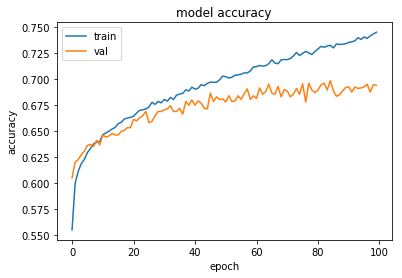

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

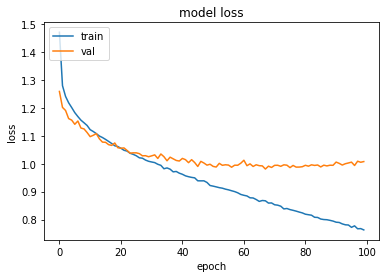

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
yPred = model.predict_classes(x_test,verbose=0)


food_cuisine_iD_trans = {}
for key, value in food_cuisine_iD.items():
    if value not in food_cuisine_iD_trans:
        food_cuisine_iD_trans[value] = key

yPred_trans=[]
for item in yPred:
    yPred_trans.append( food_cuisine_iD_trans[item] )
    
    
np.savetxt('/home/hscc/Desktop/kaggle/dnn_subm.csv', np.c_[test_iD,yPred_trans], delimiter=',', header = 'id,cuisine', comments = '', fmt='%s')
